In [2]:
from classifiers import *
from helpers import*
from proj1_helpers import *
from preprocessing import *
from validation import *
from plots import *
from features_ext import *
import pickle

# README
In this file we visualize and plt the most important results. 
The results file are saved in the project1/results folder.

The notebook is organized in sections

# Preprocessing gridSearch
We performed a grid search using a 2 very standard model (Logistic Regression and Ridge Regression with no additional features) to select the best preprocessing strategy i.e. (TODO: write)

The data were produced using the notebook: **TODO: add**

In [62]:
#import the results
with open('../results/preproc_gridsearch_res.txt', 'rb') as inpt:
    results = pickle.load(inpt)

In [64]:
#best results for logistic regression
print('Best initialization using logistic regression')
#grab the accuracies on test and make a list 
accuracies = []
accuracies = np.ones((1, 2))
for r in results:
    accuracy = np.array(r['acc_te_logreg']).reshape(1, -1)
    acc = np.zeros((1, 2))
    acc[0, 0] = accuracy.mean()
    acc[0, 1] = accuracy.std()
    accuracies = np.concatenate((accuracies, acc), axis = 0)
accuracies = accuracies[1:]
upto = 10
best = [results[i] for i in np.argsort(-accuracies[:, 0])[:upto]]
for r in best:
    print('#####################################')
    print('nan treatment', r['nan_treatment'])
    print('standardize: ', r['standardize'])
    print('Accuracy on test', np.round(r['acc_te_logreg'], 5))

Best initialization using logistic regression
#####################################
nan treatment NanToMedian
standardize:  True
Accuracy on test 0.71516
#####################################
nan treatment NanTo0
standardize:  True
Accuracy on test 0.71495
#####################################
nan treatment NanToMean
standardize:  True
Accuracy on test 0.71492
#####################################
nan treatment RemoveNan
standardize:  True
Accuracy on test 0.70011
#####################################
nan treatment NanTo0
standardize:  False
Accuracy on test 0.68932
#####################################
nan treatment RemoveNan
standardize:  False
Accuracy on test 0.65825
#####################################
nan treatment NanToMedian
standardize:  False
Accuracy on test 0.59954
#####################################
nan treatment NanToMean
standardize:  False
Accuracy on test 0.59654
#####################################
nan treatment OnlyNanFeatures
standardize:  False
Accuracy on test

# Various degree non interacting term

Here visualize the results from the logistic regression fit with the original features + constant term + features up to a given degree without interacting terms. \
A cross validation with k_fold = 4 was used. Whenever showed, the error of a quantity is the standard deviation on these 4 different iterations

The data were produced using the notebook: **crossvalidationoverfitplot.py**

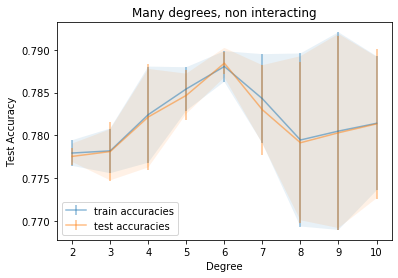

In [3]:
#import from the results file and aggregate the data
with open('../results/overfit_degre_1.pkl', 'rb') as inpt:
    results1 = pickle.load(inpt)

with open('../results/overfit_degre_2.pkl', 'rb') as inpt:
    results2 = pickle.load(inpt)

with open('../results/overfit_degre_3.pkl', 'rb') as inpt:
    results3 = pickle.load(inpt)
results = results1 + results2 + results3

#Make the plot
#acc_tr, acc_te, loss_tr, loss_te
accuracies_train_mean = np.array([np.array(r[0]).mean() for r in results])
accuracies_train_std =  np.array([np.array(r[0]).std() for r in results])
accuracies_test_mean = np.array([np.array(r[1]).mean() for r in results])
accuracies_test_std =  np.array([np.array(r[1]).std() for r in results])
degree = [i for i in range(2, 11)]
plt.errorbar(degree, accuracies_train_mean, yerr = accuracies_train_std, label = 'train accuracies', alpha = 0.5)
plt.errorbar(degree, accuracies_test_mean, yerr = accuracies_test_std, label = 'test accuracies', alpha = 0.5)
plt.fill_between(degree, accuracies_train_mean -accuracies_train_std, accuracies_train_mean +accuracies_train_std, alpha = 0.1 )
plt.fill_between(degree, accuracies_train_mean -accuracies_test_std, accuracies_test_mean +accuracies_train_std, alpha = 0.1 )
plt.legend(loc = 'lower left')
plt.xlabel('Degree')
plt.ylabel('Test Accuracy')
_ = plt.title('Many degrees, non interacting')

# Logistic Regression GridSearch Hyperparameters
In the following we print and visualize the results related with the best hyperparameters for the logistic regression.\
A cross validation with k_fold = 4 was used. Whenever showed, the error of a quantity is the standard deviation on these 4 different iterations

The results were generated using the file: **logReg_grid_Search_hyp.py**

In [45]:
#importing the files
with open('../results/logreg_gridsearch_hyp.txt', 'rb') as inpt:
    results = pickle.load(inpt)

#grab the accuracies on test and make a list 
accuracies = []
accuracies = np.ones((1, 2))
for r in results:
    accuracy = np.array(r['acc_te']).reshape(1, -1)
    acc = np.zeros((1, 2))
    acc[0, 0] = accuracy.mean()
    acc[0, 1] = accuracy.std()
    accuracies = np.concatenate((accuracies, acc), axis = 0)
accuracies = accuracies[1:]
upto = 3
accuracies[np.argpartition(-accuracies[:, 0], 55)[:upto]]
best = [results[i] for i in np.argsort(-accuracies[:, 0])[:upto]]
for r in best:
    print("learning rate: {:.2e}".format( r['learning rate']))
    print('weights initial distr', r['w_initial distr'])
    print('batch_s', r['batch_size'])
    print('accuracy', np.round(np.array(r['acc_tr']).mean(), 5) ,'+/-', np.round(np.array(r['acc_tr']).std(), 5))
    print('accuracy_test', np.round(np.array(r['acc_te']).mean(), 5) ,'+/-', np.round(np.array(r['acc_te']).std(), 5))
    print('#####################################')

#select the first 'upto' best results and print


learning rate: 1.47e-01
weights initial distr normal
batch_s 20000
accuracy 0.75133 +/- 0.00164
accuracy_test 0.75154 +/- 0.00281
#####################################
learning rate: 6.81e-05
weights initial distr normal
batch_s 20000
accuracy 0.75068 +/- 0.00045
accuracy_test 0.75054 +/- 0.00178
#####################################
learning rate: 6.81e-05
weights initial distr normal
batch_s 10000
accuracy 0.75071 +/- 0.00051
accuracy_test 0.75047 +/- 0.00167
#####################################


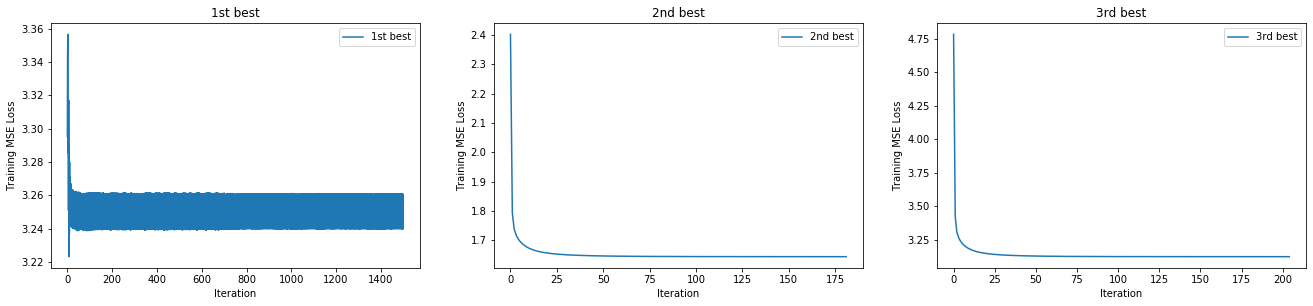

In [41]:
#plotting the train losses to see if there are numerical issues:
fig = plt.figure(figsize=(1.5*15, 1.5*3))
ax1 = plt.subplot(1, 3, 1)
ax1.plot(best[0]['losses_tr'][0], label = '1st best')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Training MSE Loss')
ax1.set_title('1st best')
plt.legend()

ax2 = plt.subplot(1, 3, 2)
ax2.plot(best[1]['losses_tr'][0], label = '2nd best')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Training MSE Loss')
ax2.set_title('2nd best')
plt.legend()

ax3 = plt.subplot(1, 3, 3)
ax3.plot(best[2]['losses_tr'][0], label = '3rd best')
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Training MSE Loss')
ax3.set_title('3rd best')

_ = plt.legend()


**Please note:** the following plot was realized using the file **scatter_plot.py**.\
Since the code to generate it is lenghty we omitted to copy it here

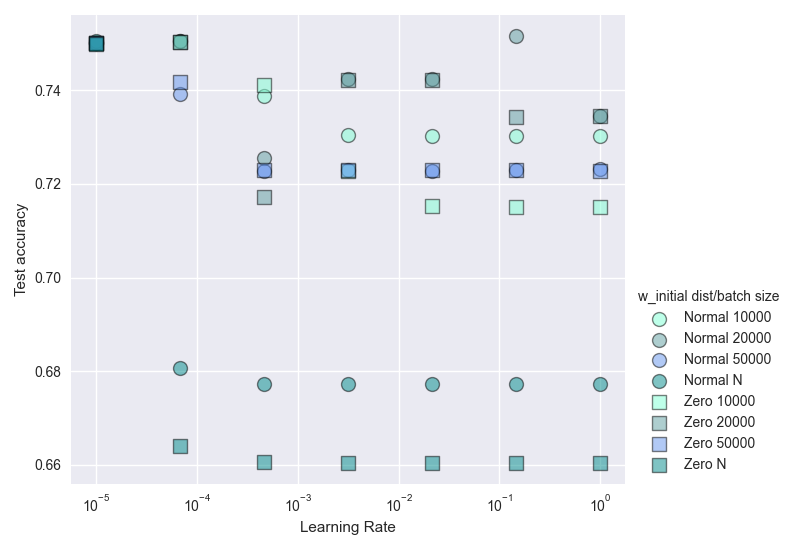

In [68]:
#visualizing the grid search
from IPython.display import Image
Image(filename=r'..\results\scatter_plot.png') 

# Logistic Regression GridSearch best features
In the following we print and visualize the results related with the selection of the best features for the logistic regression.
Each fit contains the non interactive terms up to degree 3 with 10 randomly selected interaction features of degree 2 (i.e. terms like x_1_x2, x_3_6, etc). A constant term was also included to compare our results.\
We also added an expanded dataset containing only the non interactive terms up to degree 2 to compare our results.\
The best interactive terms can be traced back thanks to the reference to the file and dataset, since we used a seed for reproducebility.\
A cross validation with k_fold = 4 was used. Whenever showed, the error of a quantity is the standard deviation on these 4 different iterations
The results were generated using the file: **logReg_grid_Search_feat.py**

In [16]:
# importing the files
with open('../results/logreg_gridsearch_feat_1_5.txt', 'rb') as inpt:
    results1 = pickle.load(inpt)
with open('../results/logreg_gridsearch_feat_5_10.txt', 'rb') as inpt:
    results2 = pickle.load(inpt)
with open('../results/logreg_gridsearch_feat_20_40.txt', 'rb') as inpt:
    results3 = pickle.load(inpt)
for r in results1:
    r['results_file'] = 1
for r in results2:
    r['results_file'] = 2
for r in results3:
    r['results_file'] = 3
results = results1 + results2 + results3

#grab the accuracies on test and make a list 
accuracies = []
accuracies = np.ones((1, 2))
for r in results:
    accuracy = np.array(r['acc_te']).reshape(1, -1)
    acc = np.zeros((1, 2))
    acc[0, 0] = accuracy.mean()
    acc[0, 1] = accuracy.std()
    accuracies = np.concatenate((accuracies, acc), axis = 0)
accuracies = accuracies[1:]

#select the first 'upto' best results and print
upto = 2
best = [results[i] for i in np.argsort(-accuracies[:, 0])[:upto]]
for r in best:
    print('learning rate', r['learning rate'])
    print('distr', r['w_initial distr'])
    print('batch_s', r['batch_size'])
    print('accuracy', np.round(np.array(r['acc_tr']).mean(), 5) ,'+/-', np.round(np.array(r['acc_tr']).std(), 5))
    print('accuracy_test', np.round(np.array(r['acc_te']).mean(), 5) ,'+/-', np.round(np.array(r['acc_te']).std(), 5))
    print('results file', r['results_file'])
    print('dataset', r['dataset'])
    print('#####################################')

learning rate 6.8e-05
distr normal
batch_s 20000
accuracy 0.81196 +/- 0.00145
accuracy_test 0.81196 +/- 0.0008
results file 3
dataset 20
#####################################
learning rate 6.8e-05
distr normal
batch_s 20000
accuracy 0.80851 +/- 0.00137
accuracy_test 0.80829 +/- 0.00079
results file 1
dataset 3
#####################################
